# Transaction Data EDA


In [1]:
import pandas as pd
import numpy as np 
import os 
from pyspark.sql import SparkSession
from dotenv import load_dotenv
from datetime  import datetime
import matplotlib.pyplot as plt
import ast
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
os.chdir('..')
load_dotenv()



True

In [3]:
from src.utils.data_preprocessing import is_missing_value,count_missing_values_per_column, find_missing_values, remove_missing_values, fill_missing_values
from src.data_ingestion.data_ingestion import  read_csv_data_from_hadoop

In [4]:

hadoop_raw_data_path = os.getenv('hadoop_raw_data_path')
product_data_path = '/transactions.csv'
path = hadoop_raw_data_path + product_data_path

In [5]:
data = read_csv_data_from_hadoop(hadoop_data_directory=path)
data.show(5)

+--------------------+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+-----------+------------+--------------------+---------------------+----------------------+------------+
|          created_at|customer_id|          booking_id|          session_id|    product_metadata|payment_method|payment_status|promo_amount| promo_code|shipment_fee| shipment_date_limit|shipment_location_lat|shipment_location_long|total_amount|
+--------------------+-----------+--------------------+--------------------+--------------------+--------------+--------------+------------+-----------+------------+--------------------+---------------------+----------------------+------------+
|2018-07-29 18:22:...|       5868|186e2bee-0637-471...|3abaa6ce-e320-4e5...|[{'product_id': 5...|    Debit Card|       Success|        1415|WEEKENDSERU|       10000|2018-08-03 08:07:...|   -8.227893136507902|    111.96910737424372|      199832|
|2018-07-30 15:40:..

In [6]:
df = pd.DataFrame(data.take(data.count()), columns=data.columns)
df.head(5)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 18:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 08:07:24.812676,-8.227893,111.969107,199832
1,2018-07-30 15:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,10000,2018-08-03 04:29:03.415705,3.013470,107.802514,155526
2,2018-09-15 14:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,None,10000,2018-09-18 11:41:49.422380,-2.579428,115.743885,550696
3,2018-11-01 14:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,0,2018-11-05 20:42:27.954235,-3.602334,120.363824,271012
4,2018-12-18 14:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,None,0,2018-12-23 20:24:07.361785,-3.602334,120.363824,198753


In [7]:
df.shape

(852584, 14)

In [8]:
is_missing_value(df)

np.True_

In [9]:
count_missing_values_per_column(df=df)


created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [10]:
# treat missing value by replacing them with other value

df = fill_missing_values(df=df, column='promo_code', value='no_code')
df.head(5)


,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 18:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 08:07:24.812676,-8.227893,111.969107,199832
1,2018-07-30 15:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,no_code,10000,2018-08-03 04:29:03.415705,3.013470,107.802514,155526
2,2018-09-15 14:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,no_code,10000,2018-09-18 11:41:49.422380,-2.579428,115.743885,550696
3,2018-11-01 14:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,no_code,0,2018-11-05 20:42:27.954235,-3.602334,120.363824,271012
4,2018-12-18 14:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,no_code,0,2018-12-23 20:24:07.361785,-3.602334,120.363824,198753


In [11]:
# flatten the column product metadata for better analysis

# Convert product_metadata from string to a list of dictionaries
df['product_metadata'] = df['product_metadata'].apply(ast.literal_eval)

# Explode the product_metadata column so that each product gets its own row
df_exploded = df.explode('product_metadata').reset_index(drop=True)

# Normalize the dictionary inside product_metadata into separate columns
product_details = pd.json_normalize(df_exploded['product_metadata'])

# Concatenate the original DataFrame (without the nested column) with the new columns
df_flattened = pd.concat([df_exploded.drop('product_metadata', axis=1), product_details], axis=1)

df_flattened.head(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 18:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 08:07:24.812676,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 15:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,no_code,10000,2018-08-03 04:29:03.415705,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 14:51:17.365620,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,no_code,10000,2018-09-18 11:41:49.422380,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 14:23:48.365620,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,no_code,0,2018-11-05 20:42:27.954235,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 14:20:30.365620,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,no_code,0,2018-12-23 20:24:07.361785,-3.602334,120.363824,198753,55220,1,198753


In [12]:
df_flattened.shape

(1254585, 16)

In [13]:
# check for missing values in the flattened dataframe
is_missing_value(df_flattened)

np.False_

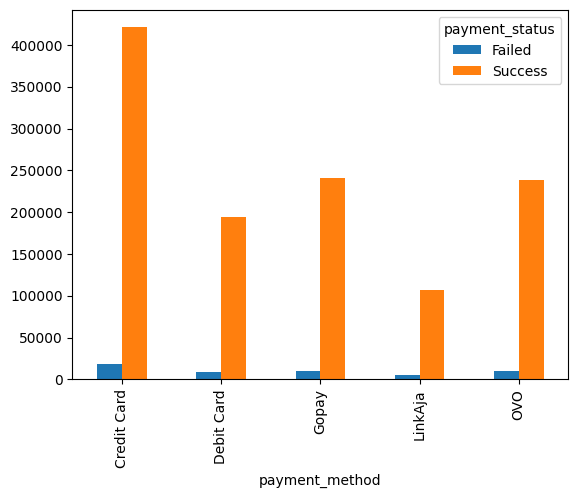

In [14]:
# aggregate data by payment method and and payment status 

df_flattened.groupby(['payment_method','payment_status']).size().unstack().plot(kind='bar', stacked=False)
plt.show()


### Time series analysis


In [15]:
df_flattened['created_at'] = pd.to_datetime(df_flattened['created_at'])
df_flattened.set_index('created_at', inplace=True)

In [16]:
df_flattened.head(2)

,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
created_at,,,,,,,,,,,,,,,
2018-07-29 18:22:01.458193,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 08:07:24.812676,-8.227893,111.969107,199832,54728,1,191247
2018-07-30 15:40:22.365620,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,no_code,10000,2018-08-03 04:29:03.415705,3.013470,107.802514,155526,16193,1,145526


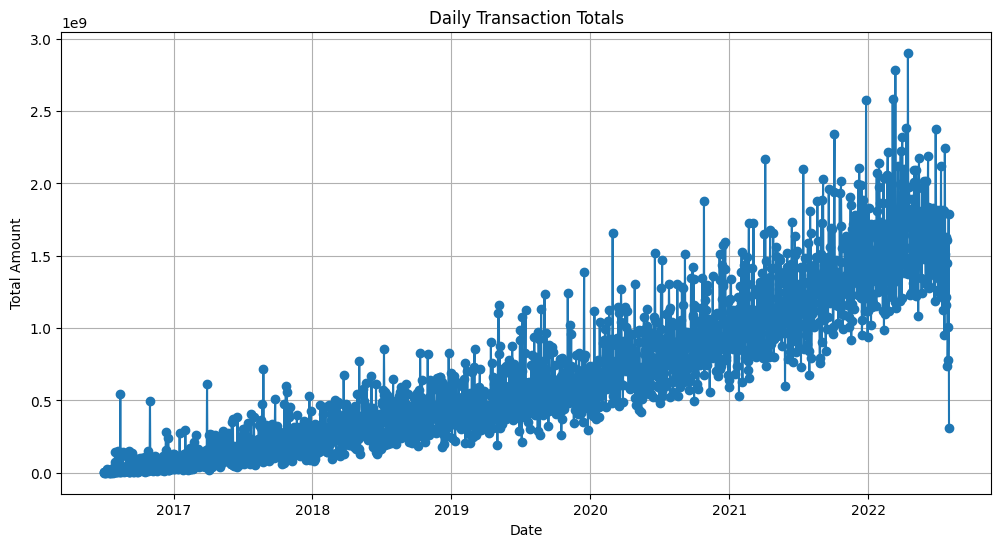

In [17]:
# Resample data to daily totals (using 'total_amount' as an example)
daily_totals = df_flattened['total_amount'].resample('D').sum()

# Plot the daily totals
plt.figure(figsize=(12, 6))
plt.plot(daily_totals, marker='o', linestyle='-')
plt.title('Daily Transaction Totals')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

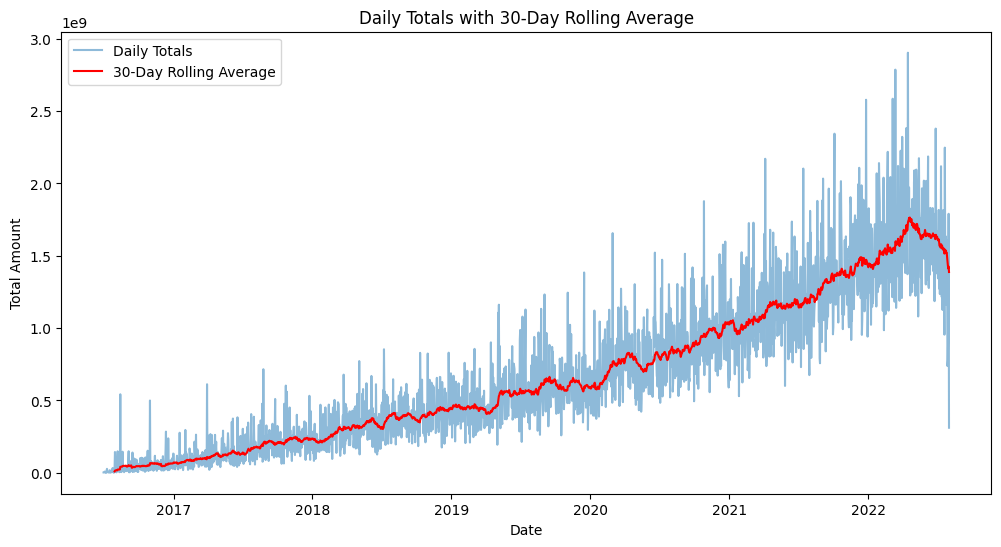

In [18]:

# Calculate and plot a rolling 7-day average for smoothing
rolling_avg = daily_totals.rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_totals, label='Daily Totals', alpha=0.5)
plt.plot(rolling_avg, label='30-Day Rolling Average', color='red')
plt.title('Daily Totals with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


### Promotional impact

In [19]:
# asegment data as promotional and non promotional transactions

promo_df =  df_flattened[(df_flattened['promo_code'] != 'no_code') | (df_flattened['promo_amount'] > 0)]
non_promo_df = df_flattened[(df_flattened['promo_code'] == 'no_code') & (df_flattened['promo_amount'] == 0)]


In [20]:
# calculate key metrics for promotional transactions
promo_metrics = promo_df.agg({
    'total_amount': ['sum', 'mean', 'count']
}).rename(columns={'sum': 'Total Sales', 'mean': 'Average Order Value', 'count': 'Transaction Count'})

print("Promotional Transactions Metrics:")
print(promo_metrics)

Promotional Transactions Metrics:
       total_amount
sum    5.637861e+11
mean   1.171774e+06
count  4.811390e+05


In [21]:
#group the promotional transaction data frame with promo_code

if 'promo_code' in df.columns:
    promo_group = promo_df.groupby('promo_code').agg(
        total_sales=('total_amount', 'sum'),
        avg_order_value=('total_amount', 'mean'),
        transaction_count=('total_amount', 'count')
    ).reset_index()
    
    print("\nMetrics by Promo Code:")
    print(promo_group)


Metrics by Promo Code:
      promo_code   total_sales  avg_order_value  transaction_count
0         AZ2022  155586781463     1.184863e+06             131312
1        BUYMORE  116497387627     1.184241e+06              98373
2      LIBURDONG   36395488250     1.170875e+06              31084
3         SC2022   19670838781     1.181503e+06              16649
4        STARTUP   20214991605     1.231345e+06              16417
5  WEEKENDMANTAP   34318974756     1.143470e+06              30013
6    WEEKENDSERU  106414186422     1.163136e+06              91489
7         XX2022   74687436338     1.135033e+06              65802


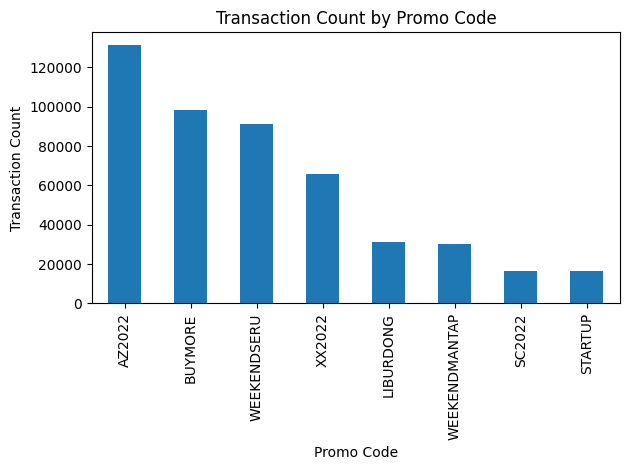

In [22]:
# Visualize the transaction counts per promo code
promo_group.sort_values(by='transaction_count', ascending=False).plot(
    kind='bar', x='promo_code', y='transaction_count', legend=False
)
plt.title("Transaction Count by Promo Code")
plt.xlabel("Promo Code")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

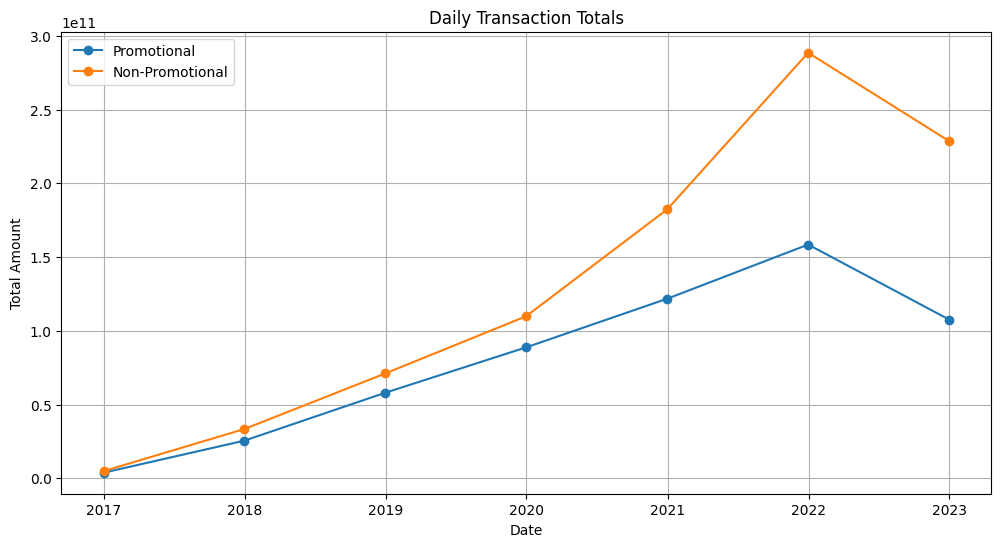

In [23]:
# plot line graph to show the total sales overtime for both promotional and non promotional transactions

promo_daily_totals = promo_df['total_amount'].resample('YE').sum()
non_promo_daily_totals = non_promo_df['total_amount'].resample('YE').sum()

plt.figure(figsize=(12, 6))
plt.plot(promo_daily_totals, label='Promotional', marker='o', linestyle='-')

plt.plot(non_promo_daily_totals, label='Non-Promotional', marker='o', linestyle='-')

plt.title('Daily Transaction Totals')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)

plt.show()



In [ ]:

# Create a figure
fig = go.Figure()
pio.renderers.default = 'notebook'
# Add trace for Promotional totals
fig.add_trace(go.Scatter(
    x=promo_daily_totals.index, 
    y=promo_daily_totals.values, 
    mode='lines+markers', 
    name='Promotional'
))

# Add trace for Non-Promotional totals
fig.add_trace(go.Scatter(
    x=non_promo_daily_totals.index, 
    y=non_promo_daily_totals.values, 
    mode='lines+markers', 
    name='Non-Promotional'
))

# Update the layout for titles and axis labels
fig.update_layout(
    title='Daily Transaction Totals',
    xaxis_title='Date',
    yaxis_title='Total Amount',
    template='plotly_white',
    hovermode='x'
)

# Show the interactive plot
fig.show(renderer='browser')


In [38]:
df_flattened = df_flattened.reset_index(level='created_at')

### Customer retention 

In [40]:
# metrics for customer retention
# create a cohort analysis to track customer retention over time
# crete a cohort identifier based on customer's fisrt purchase month




# Create a cohort identifier based on the customer's first purchase month
df_flattened['cohort'] = df_flattened.groupby('customer_id')['created_at'].transform('min').dt.to_period('M')

# Extract the order month for each transaction
df_flattened['order_month'] = df_flattened['created_at'].dt.to_period('M')

# Calculate the number of months between the first purchase and each transaction
df_flattened['cohort_index'] = (df_flattened['order_month'].dt.year - df_flattened['cohort'].dt.year) * 12 + (df_flattened['order_month'].dt.month - df_flattened['cohort'].dt.month) + 1

# Aggregate data: count unique customers in each cohort by cohort_index
cohort_data = df_flattened.groupby(['cohort', 'cohort_index'])['customer_id'].nunique().reset_index()

# Create a pivot table for cohorts
cohort_pivot = cohort_data.pivot(index='cohort', columns='cohort_index', values='customer_id')

# Calculate retention rates (percentage of customers retained)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)




Retention Rates:


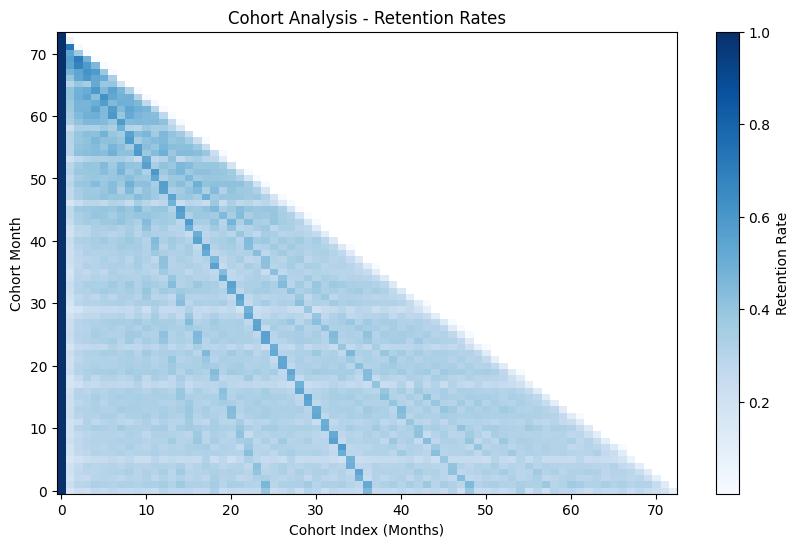

In [43]:
print("Retention Rates:")


# Optional: visualize retention using a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(retention, aspect='auto', cmap='Blues', origin='lower')
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.colorbar(label='Retention Rate')
plt.show()